# 台灣台北地區確診者趨勢圖 Confirmed Case Trend in Taiwan, Taipei

In [25]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from matplotlib import dates
pd.options.mode.chained_assignment = None
plt.rcParams['figure.figsize'] = [10, 5]

In [26]:
r = requests.post(
    'https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.json')
r.encoding = 'uft-8'

df = pd.read_json(StringIO(r.text.replace("/", "-")))

mdf = pd.DataFrame(columns=['Time', '台北市', '新北市', 'others'])
mdf['Time'] = pd.date_range(
    start="2021-05-17", end=(datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d'))
mdf = mdf.replace(np.nan, 0)

In [27]:
for i in range(len(mdf)):
    for j in range(len(df)):
        # date = str(df['個案研判日'][j])[0:4]+'-'+str(df['個案研判日']
        #                                         [j])[4:6]+'-'+str(df['個案研判日'][j])[6:8]
        date = str(df['個案研判日'][j])
        if (date == mdf['Time'][i].strftime('%Y-%m-%d')):
            if (df['縣市'][j] == '台北市'):
                mdf['台北市'][i] = df['確定病例數'][j] + mdf['台北市'][i]
            elif (df['縣市'][j] == '新北市'):
                mdf['新北市'][i] = df['確定病例數'][j] + mdf['新北市'][i]
            else:
                mdf['others'][i] = df['確定病例數'][j] + mdf['others'][i]

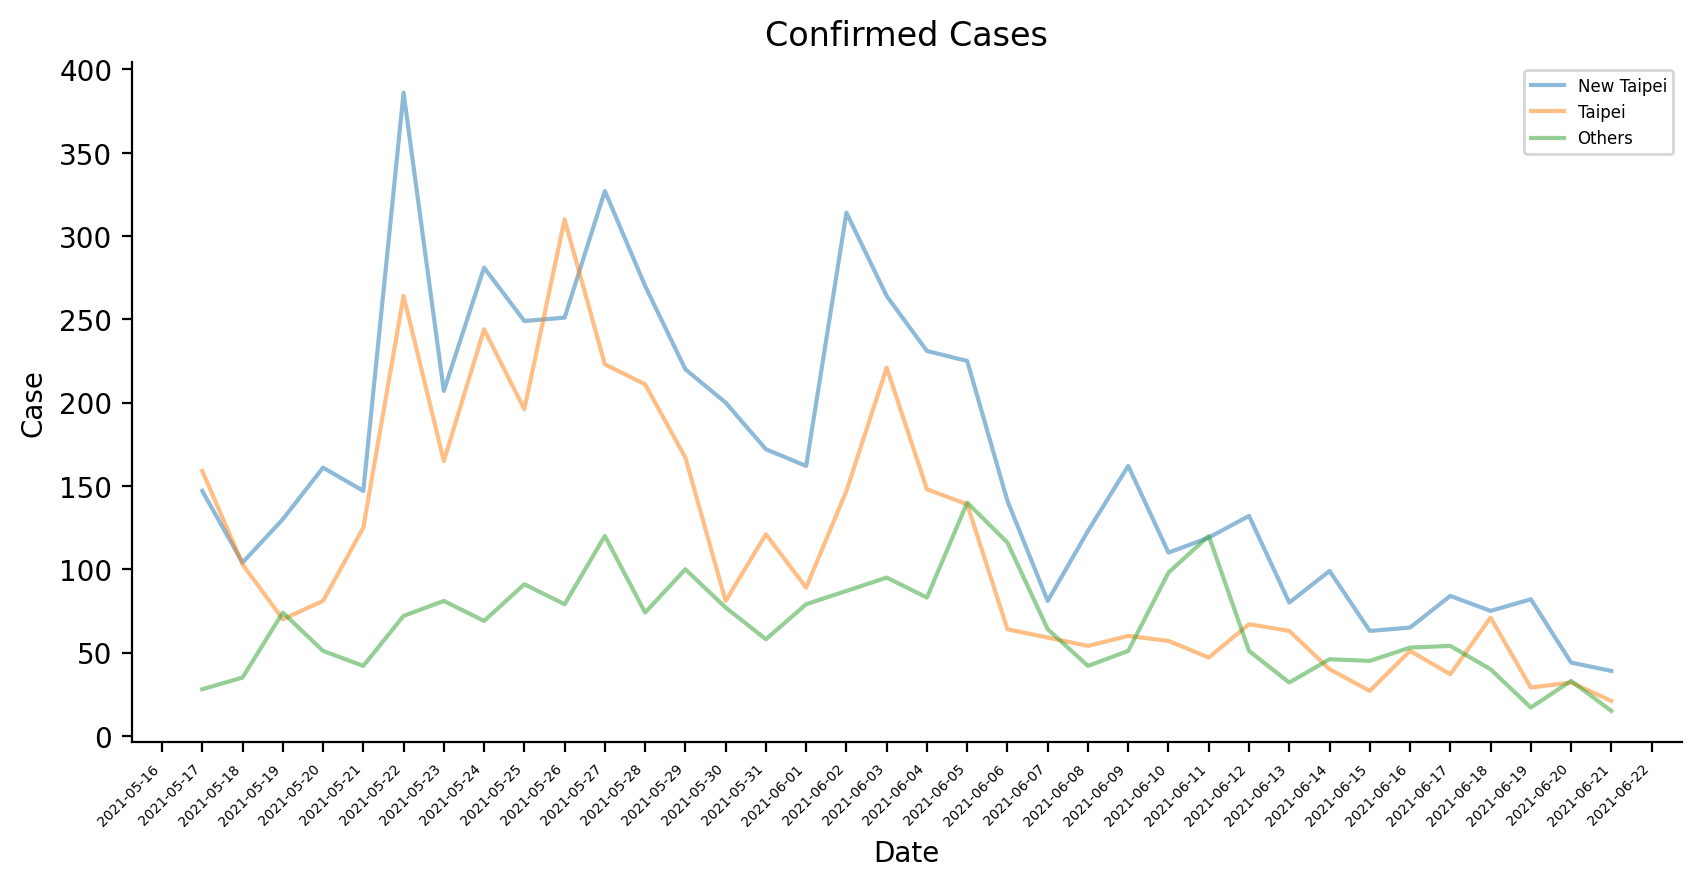

In [28]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(mdf["Time"], mdf["新北市"], alpha=0.5, label="New Taipei")
plt.plot(mdf["Time"], mdf["台北市"], alpha=0.5, label="Taipei")
plt.plot(mdf["Time"], mdf["others"], alpha=0.5,
        label="Others")
plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

In [29]:
print(mdf)
print(mdf.sum(axis=0))

         Time  台北市  新北市  others
0  2021-05-17  159  147      28
1  2021-05-18  103  104      35
2  2021-05-19   70  130      74
3  2021-05-20   81  161      51
4  2021-05-21  125  147      42
5  2021-05-22  264  386      72
6  2021-05-23  165  207      81
7  2021-05-24  244  281      69
8  2021-05-25  196  249      91
9  2021-05-26  310  251      79
10 2021-05-27  223  327     120
11 2021-05-28  211  270      74
12 2021-05-29  167  220     100
13 2021-05-30   81  200      77
14 2021-05-31  121  172      58
15 2021-06-01   89  162      79
16 2021-06-02  147  314      87
17 2021-06-03  221  264      95
18 2021-06-04  148  231      83
19 2021-06-05  139  225     140
20 2021-06-06   64  141     116
21 2021-06-07   59   81      64
22 2021-06-08   54  123      42
23 2021-06-09   60  162      51
24 2021-06-10   57  110      98
25 2021-06-11   47  119     120
26 2021-06-12   67  132      51
27 2021-06-13   63   80      32
28 2021-06-14   40   99      46
29 2021-06-15   27   63      45
30 2021-

# 台北各行政區確診者趨勢圖 Confirmed Case Trend in each District of Taipei

### 每日趨勢 Daily trend

In [30]:
Name = ['Beitou', 'Shilin', 'Datong', 'Zhongshan', 'Songshan', 'Neihu', 'Wanhua', 'Zhongzheng', 'Daan', 'Xinyi', 'Nangang', 'Wenshan']
tpdf = pd.DataFrame(columns=['Time']+Name)
tpdf['Time'] = pd.date_range(
    start="2021-05-17", end=(datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d'))
tpdf = tpdf.replace(np.nan, 0)

In [31]:
Cname = ['北投區', '士林區', '大同區', '中山區', '松山區', '內湖區', '萬華區', '中正區', '大安區', '信義區', '南港區', '文山區']
for i in range(len(tpdf)):
    for j in range(len(df)):
        date = str(df['個案研判日'][j])
        if (date == tpdf['Time'][i].strftime('%Y-%m-%d')):
            for k in range(len(Name)):
                if (df['鄉鎮'][j] == Cname[k]):
                    tpdf[Name[k]][i] = df['確定病例數'][j] + tpdf[Name[k]][i]

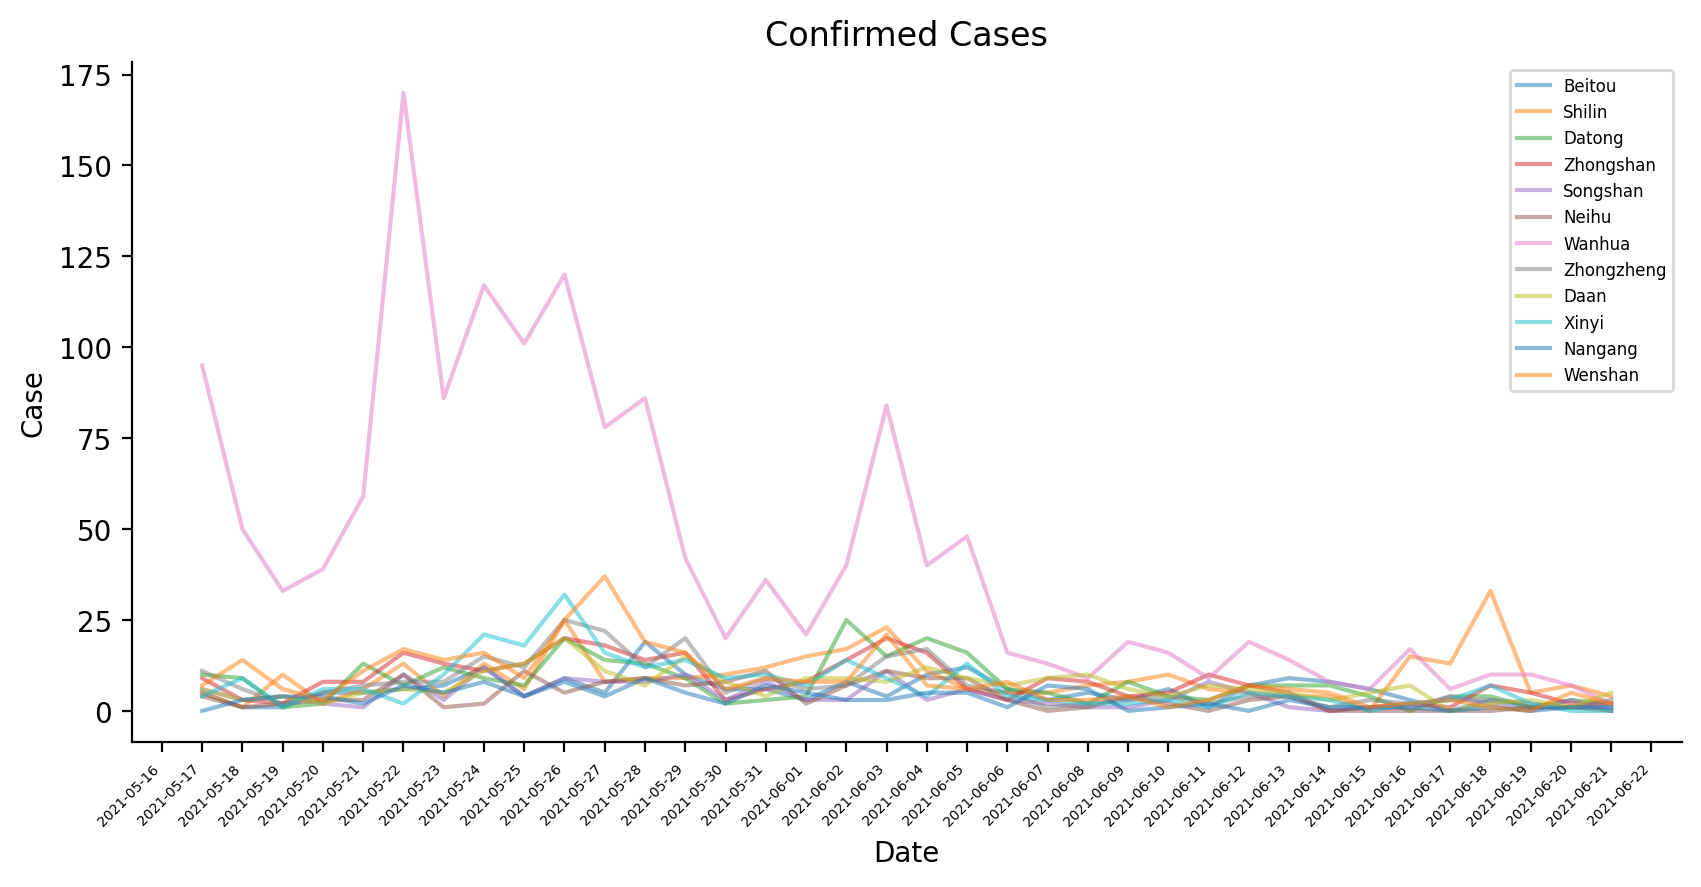

In [32]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(1,13):
    plt.plot(tpdf["Time"], tpdf[str(tpdf.keys()[i])], alpha=0.5, label=str(tpdf.keys()[i]))

plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

### 累積病例 Cumulative trend

In [33]:
for i in range(len(tpdf)):
    for j in range(len(df)):
        date = str(df['個案研判日'][j])
        if (date >= tpdf['Time'][i].strftime('%Y-%m-%d')):
            for k in range(len(Name)):
                if (df['鄉鎮'][j] == Cname[k]):
                    tpdf[Name[k]][i] = df['確定病例數'][j] + tpdf[Name[k]][i]

In [34]:
tpdf = tpdf.iloc[::-1]
for i in range(len(tpdf)):
    tpdf["Time"][i] = mdf["Time"][len(mdf)-i-1]

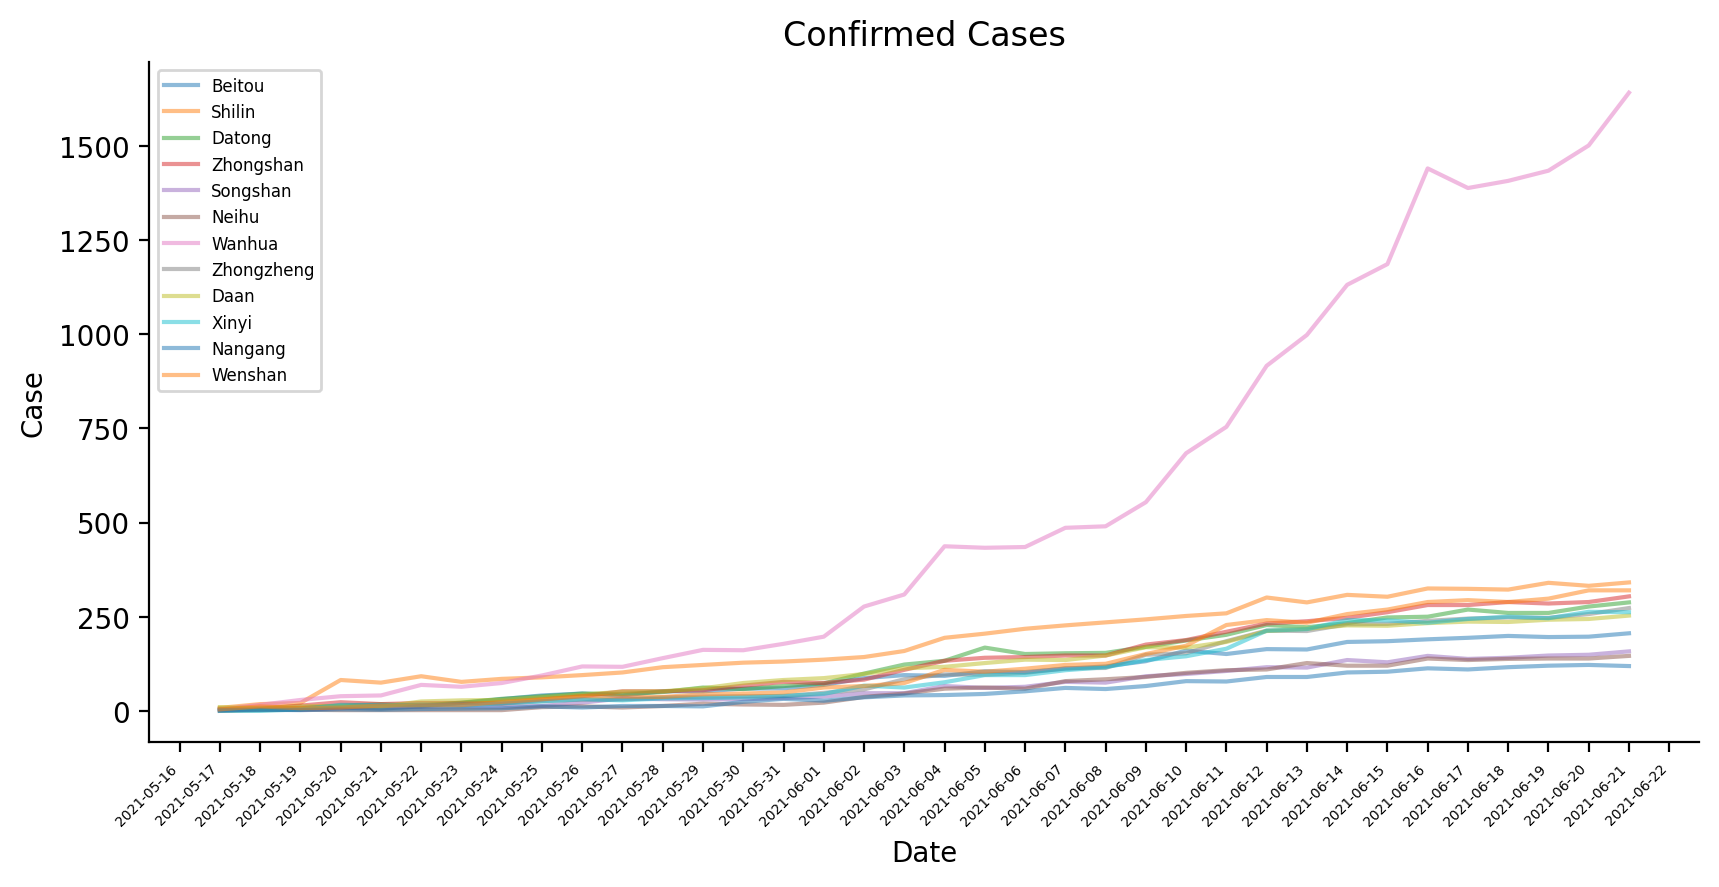

In [35]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(1,13):
    plt.plot(tpdf["Time"], tpdf[str(tpdf.keys()[i])], alpha=0.5, label=str(tpdf.keys()[i]))

plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()

In [36]:
print(tpdf.sum(axis=0))

Beitou         3541
Shilin         6696
Datong         4633
Zhongshan      4758
Songshan       2402
Neihu          2171
Wanhua        19404
Zhongzheng     3931
Daan           4341
Xinyi          3831
Nangang        1818
Wenshan        4521
dtype: int64


## Reference
* **疾病管制署開放資料(Taiwan CDC open-source database):** https://data.cdc.gov.tw/dataset/agsdctable-day-19cov.
